In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
directory='/kaggle/input/brain-tumor-mri-scans'
classes=['pituitary','healthy','meningioma','glioma']

data= image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='categorical',
    class_names=classes,
    color_mode='rgb',
    batch_size=None,
    image_size=(256, 256),
    shuffle=True,
    seed=99,
)

Found 7023 files belonging to 4 classes.


In [3]:
size=len(data)

val_size=int(0.1*size)

train_set=data.take(int(0.8*size))
remaining_set=data.skip(int(0.8*size))
val_set=remaining_set.take(val_size)
test_set=remaining_set.skip(val_size)


print(len(train_set))
print(len(val_set))
print(len(test_set))

5618
702
703


In [4]:
def resize_rescale (image,label):
    
    image=tf.image.resize(image,[255,255])
    image=image/255.0
    
    return(image,label)

train_set=train_set.batch(batch_size=32).shuffle(buffer_size=200,reshuffle_each_iteration=True).prefetch(tf.data.AUTOTUNE).map(resize_rescale,num_parallel_calls=tf.data.AUTOTUNE)
val_set=val_set.batch(batch_size=32).shuffle(buffer_size=200,reshuffle_each_iteration=True).prefetch(tf.data.AUTOTUNE).map(resize_rescale,num_parallel_calls=tf.data.AUTOTUNE)
test_set=test_set.batch(batch_size=32).shuffle(buffer_size=200,reshuffle_each_iteration=True).prefetch(tf.data.AUTOTUNE).map(resize_rescale,num_parallel_calls=tf.data.AUTOTUNE)



In [5]:
from tensorflow.keras.utils import to_categorical
import numpy as np

# Example: Class labels
labels = [0, 1, 2, 3]  # class indices for 4 classes

# One-hot encode the labels
one_hot_labels = to_categorical(labels, num_classes=4)
print("One-hot encoded labels:")
print(one_hot_labels)
import tensorflow as tf
from tensorflow.keras import layers, models


# Define the model
model = models.Sequential([
    # Input layer for 224x224 grayscale images
    layers.InputLayer(input_shape=(255, 255, 3)),
    
    layers.Conv2D(32, (3, 3), padding='same',strides=1 ),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    
    # First Convolutional Block
    layers.Conv2D(64, (3, 3), padding='same',strides=1 ),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.MaxPooling2D(pool_size=(2, 2), strides=2),

    # Second Convolutional Block
    layers.Conv2D(128, (3, 3), padding='same',strides=1),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.MaxPooling2D(pool_size=(2, 2), strides=2),

    # Third Convolutional Block
    layers.Conv2D(256, (3, 3), padding='same',strides=1),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.MaxPooling2D(pool_size=(2, 2), strides=2),

    layers.Conv2D(512, (3, 3), padding='same',strides=1),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.MaxPooling2D(pool_size=(2, 2), strides=2),


    
    #layers.GlobalAveragePooling2D(),#fuck u laila
    # Fully connected layer
    layers.Flatten(),

    layers.Dense(1024, activation='relu'),  # First dense layer with 128 units
    #layers.Dropout(0.5),                   # Dropout to prevent overfitting
    #layers.Dense(2048, activation='relu'),   # Second dense layer with 64 units
    #layers.Dropout(0.5),
    #layers.Dense(1024, activation='relu'),   # Second dense layer with 64 units
    layers.Dropout(0.5),
    layers.Dense(4, activation='softmax')  # 4 classes in output
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


model.summary()

One-hot encoded labels:
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 255, 255, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 255, 255, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 255, 255, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 127, 127, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 127, 127, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 127, 127, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 63, 63, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 63, 63, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 63, 63, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 31, 31, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 31, 31, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 31, 31, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_3 (ReLU)                  │ (None, 31, 31, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 15, 15, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 15, 15, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 15, 15, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_4 (ReLU)                  │ (None, 15, 15, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │    25,691,136 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 27,267,780 (104.02 MB)

 Trainable params: 27,265,796 (104.01 MB)

 Non-trainable params: 1,984 (7.75 KB)

In [6]:
history = model.fit(train_set,
                    validation_data=val_set,
                    epochs=45,  #one epoch--> entire dataset passed forward and backward thru NN
                    verbose=1
                    #callbacks=[early_stopping]
                    )

Epoch 1/45


I0000 00:00:1734620796.997107    1331 service.cc:145] XLA service 0x7ed82c016c30 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1734620796.997180    1331 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1734620796.997187    1331 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  1/176 ━━━━━━━━━━━━━━━━━━━━ 1:02:35 21s/step - accuracy: 0.2812 - loss: 2.3004

I0000 00:00:1734620809.185192    1331 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


176/176 ━━━━━━━━━━━━━━━━━━━━ 66s 256ms/step - accuracy: 0.5025 - loss: 10.3208 - val_accuracy: 0.2635 - val_loss: 1.3536
Epoch 2/45
176/176 ━━━━━━━━━━━━━━━━━━━━ 28s 128ms/step - accuracy: 0.7339 - loss: 0.7763 - val_accuracy: 0.2664 - val_loss: 1.4029
Epoch 3/45
176/176 ━━━━━━━━━━━━━━━━━━━━ 27s 124ms/step - accuracy: 0.8007 - loss: 0.5232 - val_accuracy: 0.2963 - val_loss: 2.9934
Epoch 4/45
176/176 ━━━━━━━━━━━━━━━━━━━━ 28s 124ms/step - accuracy: 0.8164 - loss: 0.4500 - val_accuracy: 0.8590 - val_loss: 0.3963
Epoch 5/45
176/176 ━━━━━━━━━━━━━━━━━━━━ 28s 127ms/step - accuracy: 0.8517 - loss: 0.3889 - val_accuracy: 0.8533 - val_loss: 0.4105
Epoch 6/45
176/176 ━━━━━━━━━━━━━━━━━━━━ 27s 124ms/step - accuracy: 0.8463 - loss: 0.3719 - val_accuracy: 0.8889 - val_loss: 0.3317
Epoch 7/45
176/176 ━━━━━━━━━━━━━━━━━━━━ 28s 127ms/step - accuracy: 0.8596 - loss: 0.3722 - val_accuracy: 0.9017 - val_loss: 0.3085
Epoch 8/45
176/176 ━━━━━━━━━━━━━━━━━━━━ 27s 124ms/step - accuracy: 0.8720 - loss: 0.3472 - va

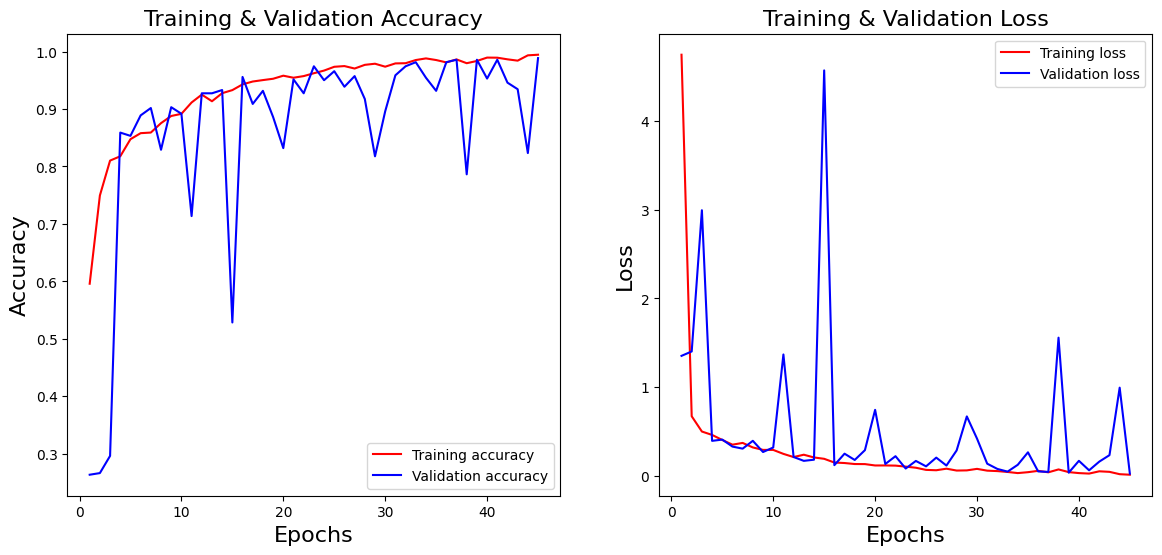

In [7]:
import matplotlib.pyplot as plt
# Extract training history for plotting
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

# Plot training curves
epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))


# Plot the model accuracy vs Epochs
ax[0].plot(epochs, accuracy, 'r', label='Training accuracy')
ax[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy')
ax[0].set_title('Training & Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()

# Plot the loss vs Epochs
ax[1].plot(epochs, loss_values, 'r', label='Training loss')
ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend();

In [8]:
import PIL

test_loss, test_accuracy = model.evaluate(test_set)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy*100}")

predictions = model.predict(test_set)
print(predictions)
print(np.argmax(np.round(predictions[0])))

22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 164ms/step - accuracy: 0.9918 - loss: 0.0148
Test Loss: 0.017950929701328278
Test Accuracy: 99.28876161575317
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step
[[1.5556759e-22 1.0000000e+00 6.6962418e-15 4.1609393e-27]
 [4.0006500e-09 1.7327192e-08 9.9983037e-01 1.6954583e-04]
 [1.2490510e-10 1.8313431e-10 9.9999988e-01 1.7198786e-07]
 ...
 [4.4813916e-18 8.6487305e-17 1.0000000e+00 3.6936991e-09]
 [1.9960674e-12 7.3471562e-13 7.1913447e-10 1.0000000e+00]
 [2.2215146e-11 3.1968948e-11 9.9849808e-01 1.5019028e-03]]
1
